In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import os

In [18]:
## function to get k nearest neighboor
## input
## job: (time, index of experiment 0-139 single num, 'reg001_A' experiement name, index of cells below to that sample)
## n_neighbor: int, number of neighbor cells 
## return: return 2d array, index of nearest neighbor cells in the main file
def get_windows(job,n_neighbors):
    '''
    For each region and each individual cell in dataset, return the indices of the nearest neighbors.
    
    'job:  meta data containing the start time,index of region (slice), region name, indices of region in original dataframe
    n_neighbors:  the number of neighbors to find for each cell
    '''
    start_time,idx,tissue_name,indices = job 
    #[(time, index of experiment 0-139 single num, 'reg001_A' experiement name), index of cells below to that sample]
    job_start = time.time()
    
    print ("Starting:", str(idx+1)+'/'+str(len(exps)),': ' + exps[idx]) #exps is list of samples (len=140)

    tissue = tissue_group.get_group(tissue_name) # df of x, y, sample name
    to_fit = tissue.loc[indices][[X,Y]].values # 2D array of coordinates

    fit = NearestNeighbors(n_neighbors=n_neighbors).fit(tissue[[X,Y]].values)
    m = fit.kneighbors(to_fit) ## the k nearest result
    # TODO: remove self 
    m = m[0], m[1] ##m[0] is the 2d array distance, m[1] is 2d array of point indices # NOT NEEDED
    

    #sort_neighbors
    args = m[0].argsort(axis = 1) # 2d aray, index of sorted distance 
    add = np.arange(m[1].shape[0])*m[1].shape[1] #1d array, num sample * n_nei
    sorted_indices = m[1].flatten()[args+add[:,None]] #it's the same as m[1]..., may only has different order 

    neighbors = tissue.index.values[sorted_indices] 
   
    end_time = time.time()
   
    print ("Finishing:", str(idx+1)+"/"+str(len(exps)),": "+ exps[idx],end_time-job_start,end_time-start_time)
    return neighbors.astype(np.int32) # return 2d array, index of nearest neighbor


In [37]:
## read in file
path = "/Volumes/shared/yanwen/xenium/data"
cells = pd.read_csv(os.path.join(path, "meta_noP3AUOQ.csv"))
cells

,orig.ident,nCount_Xenium,nFeature_Xenium,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,nCount_SCT,nFeature_SCT,SCT_snn_res.0.3,seurat_clusters,cell_types,region,hist_region,big_hist_region,x_centroid,y_centroid
0,SeuratProject,15,13,0,0,0,0,0,0,66,21,7,7,Myeloid,P2LIQ,A1,adipose,844.423276,827.897147
1,SeuratProject,9,9,0,0,0,0,0,0,61,23,5,5,T cells,P2LIQ,A1,adipose,742.822128,858.835352
2,SeuratProject,31,20,0,0,0,0,0,0,74,21,0,0,Fibroblasts,P2LIQ,A1,adipose,847.485745,789.033875
3,SeuratProject,40,25,0,0,0,0,0,0,81,25,9,9,Adipocytes,P2LIQ,A1,adipose,826.458621,795.160992
4,SeuratProject,11,8,0,0,0,0,0,0,62,18,7,7,Myeloid,P2LIQ,A1,adipose,704.899542,868.776315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191657,SeuratProject,165,67,0,0,0,0,0,0,116,67,6,6,T cells,P3PUOQ,Tissue,connective_tissue,2537.883350,3657.779517
191658,SeuratProject,286,60,0,0,0,0,0,0,106,32,0,0,Fibroblasts,P3PUOQ,Tissue,connective_tissue,2544.344055,3734.579590
191659,SeuratProject,158,49,0,0,0,0,1,1,117,49,0,0,Fibroblasts,P3PUOQ,Tissue,connective_tissue,2677.754834,3494.945581
191660,SeuratProject,101,37,0,0,0,0,0,0,101,37,13,13,Mast cells,P3PUOQ,Tissue,connective_tissue,2677.324231,3429.819727


In [38]:
cells.head() 

,orig.ident,nCount_Xenium,nFeature_Xenium,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,nCount_SCT,nFeature_SCT,SCT_snn_res.0.3,seurat_clusters,cell_types,region,hist_region,big_hist_region,x_centroid,y_centroid
0,SeuratProject,15,13,0,0,0,0,0,0,66,21,7,7,Myeloid,P2LIQ,A1,adipose,844.423276,827.897147
1,SeuratProject,9,9,0,0,0,0,0,0,61,23,5,5,T cells,P2LIQ,A1,adipose,742.822128,858.835352
2,SeuratProject,31,20,0,0,0,0,0,0,74,21,0,0,Fibroblasts,P2LIQ,A1,adipose,847.485745,789.033875
3,SeuratProject,40,25,0,0,0,0,0,0,81,25,9,9,Adipocytes,P2LIQ,A1,adipose,826.458621,795.160992
4,SeuratProject,11,8,0,0,0,0,0,0,62,18,7,7,Myeloid,P2LIQ,A1,adipose,704.899542,868.776315


In [39]:
plot_path = "/Users/yanwengong/Documents/kai_lab/sc_spatial/xenium/plot/neighborhood_20230516"

In [40]:
ks = [100] # k=5 means it collects 5 nearest neighbors for each center cell
X = 'x_centroid'
Y = 'y_centroid'
sample_col ='region'
cluster_col = 'cell_types'
keep_cols = [X,Y,sample_col,cluster_col]

cells = pd.concat([cells,pd.get_dummies(cells[cluster_col])],1) ## add one-hot-encoding od cell cluster
#cells = cells.reset_index() #Uncomment this line if you do any subsetting of dataframe such as removing dirt etc or will throw error at end of next next code block (cell 6)

cellType_lst = cells[cluster_col].unique() 
values_oneHotEncode = cells[cellType_lst].values


/Users/yanwengong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


In [41]:
values_oneHotEncode.shape

(191662, 12)

In [43]:
cellType_lst

array(['Myeloid', 'T cells', 'Fibroblasts', 'Adipocytes', 'Vascular',
       'Basal', 'B cells', 'Lymphatic', 'Mast cells', 'LumHR', 'LumSec',
       'Pericytes'], dtype=object)

In [42]:
values_oneHotEncode

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [44]:
cells.head()

,orig.ident,nCount_Xenium,nFeature_Xenium,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,nCount_SCT,...,Basal,Fibroblasts,LumHR,LumSec,Lymphatic,Mast cells,Myeloid,Pericytes,T cells,Vascular
0,SeuratProject,15,13,0,0,0,0,0,0,66,...,0,0,0,0,0,0,1,0,0,0
1,SeuratProject,9,9,0,0,0,0,0,0,61,...,0,0,0,0,0,0,0,0,1,0
2,SeuratProject,31,20,0,0,0,0,0,0,74,...,0,1,0,0,0,0,0,0,0,0
3,SeuratProject,40,25,0,0,0,0,0,0,81,...,0,0,0,0,0,0,0,0,0,0
4,SeuratProject,11,8,0,0,0,0,0,0,62,...,0,0,0,0,0,0,1,0,0,0


In [8]:
## Identify k nearest neighbor

In [45]:
#read in data and do some quick data rearrangement
n_neighbors = max(ks) ## 100
#find windows for each cell in each sample
tissue_group = cells[[X,Y,sample_col]].groupby(sample_col)
exps = list(cells[sample_col].unique())
tissue_chunks = [(time.time(),exps.index(t),t,a) for t,indices in tissue_group.groups.items() for a in np.array_split(indices,1)] 
tissues = [get_windows(job,n_neighbors) for job in tissue_chunks]



Starting: 1/15 : P2LIQ
Finishing: 1/15 : P2LIQ 0.3559110164642334 0.3568720817565918
Starting: 2/15 : P2LOQ
Finishing: 2/15 : P2LOQ 0.16225194931030273 0.5285201072692871
Starting: 3/15 : P2UIQ
Finishing: 3/15 : P2UIQ 0.1778099536895752 0.714648962020874
Starting: 4/15 : P2UOQ
Finishing: 4/15 : P2UOQ 0.13683104515075684 0.8574481010437012
Starting: 5/15 : P3ALIQ
Finishing: 5/15 : P3ALIQ 0.15496206283569336 1.0243568420410156
Starting: 6/15 : P3ALOQ
Finishing: 6/15 : P3ALOQ 0.16525793075561523 1.1951959133148193
Starting: 7/15 : P3AUIQ
Finishing: 7/15 : P3AUIQ 0.2702338695526123 1.4708361625671387
Starting: 8/15 : P3MLIQ
Finishing: 8/15 : P3MLIQ 0.10362792015075684 1.5838217735290527
Starting: 9/15 : P3MLOQ
Finishing: 9/15 : P3MLOQ 0.3242228031158447 1.9170329570770264
Starting: 10/15 : P3MUIQ
Finishing: 10/15 : P3MUIQ 0.1013329029083252 2.031954050064087
Starting: 11/15 : P3MUOQ
Finishing: 11/15 : P3MUOQ 0.061128854751586914 2.099810838699341
Starting: 12/15 : P3PLIQ
Finishing: 12/15 :

In [46]:
tissue_chunks

[(1684263261.003917,
  0,
  'P2LIQ',
  Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                  9,
              ...
              19603, 19604, 19605, 19606, 19607, 19608, 19609, 19610, 19611,
              19612],
             dtype='int64', length=19613)),
 (1684263261.003995,
  1,
  'P2LOQ',
  Int64Index([19613, 19614, 19615, 19616, 19617, 19618, 19619, 19620, 19621,
              19622,
              ...
              30566, 30567, 30568, 30569, 30570, 30571, 30572, 30573, 30574,
              30575],
             dtype='int64', length=10963)),
 (1684263261.004061,
  2,
  'P2UIQ',
  Int64Index([30576, 30577, 30578, 30579, 30580, 30581, 30582, 30583, 30584,
              30585,
              ...
              41785, 41786, 41787, 41788, 41789, 41790, 41791, 41792, 41793,
              41794],
             dtype='int64', length=11219)),
 (1684263261.004123,
  3,
  'P2UOQ',
  Int64Index([41795, 41796, 41797, 41798, 41799, 41800, 41801, 41802, 41803

In [47]:
#for each cell and its nearest neighbors, reshape and count the number of each cell type in those neighbors.
## return: out_dict
## key: (sample, #neighbor)
## values: (one-hot-encoding of ncell x n_neibor x n_cellType, indices of each cell in this sample)
out_dict = {}
for k in ks: ## ks is k nearest neighbor list
    for neighbors,job in zip(tissues,tissue_chunks): ## 2d array n_samplex20 neighbor and job

        chunk = np.arange(len(neighbors))#indices, 1d array 0 to n_sample-1
        tissue_name = job[2] ## sample/patient name
        indices = job[3] #indices of each cell in this sample
        # window is one-hot-encoding of ncell x n_neibor x n_cellType
        window = values_oneHotEncode[neighbors[chunk,:k].flatten()].reshape(len(chunk),k,len(cellType_lst)).sum(axis = 1) # sum the one-hot-encoding of near nei
        #key("samplename", k), value(one-hot-encoding of neibor, cell index in original file)
        out_dict[(tissue_name,k)] = (window.astype(np.float16),indices) 

#concatenate the summed windows and combine into one dataframe for each window size tested.
## return: windows (dictionary)
## key: #neighbor
## values:  df of x, y, sample, cellTypes, one-hot-encoding SUM of k nearest cell type
windows = {}
for k in ks:
    #df, cell number x cell_type, for each window, the one-hot-encoding of cell types count
    window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = cellType_lst) for exp in exps],0)
    window = window.loc[cells.index.values] # enlarge the df to row =  all ncells across samples
    window = pd.concat([cells[keep_cols],window],1) # df of x, y, sample, cellTypes, one-hot-encoding of knear cell type
    windows[k] = window

/Users/yanwengong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [48]:
## cluster window

In [49]:
k = 100 ## k nearest neighbor when define window
n_neighborhoods = 15 ## number of k mean when cluster window 
neighborhood_name = "neighborhood"+str(k)
k_centroids = {}

In [50]:
windows2 = windows[k]
# windows2[cluster_col] = cells[cluster_col]

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)

labelskm = km.fit_predict(windows2[cellType_lst].values) # k-mean based on neighbor counts # consider all cells among samples
k_centroids[k] = km.cluster_centers_ # coordinate of cluster center 
cells[neighborhood_name] = labelskm
cells[neighborhood_name] = cells[neighborhood_name].astype('category')



/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python

/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python

/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python

/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python

/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/yanwengong/anaconda3/lib/python

In [51]:
cell_order = ["Adipocytes", "B cells", "Basal",
                                       "Fibroblasts", "LumHR", "LumSec",
                                       "Lymphatic", "Mast cells", "Myeloid",
                                       "Pericytes", "T cells", "Vascular"]

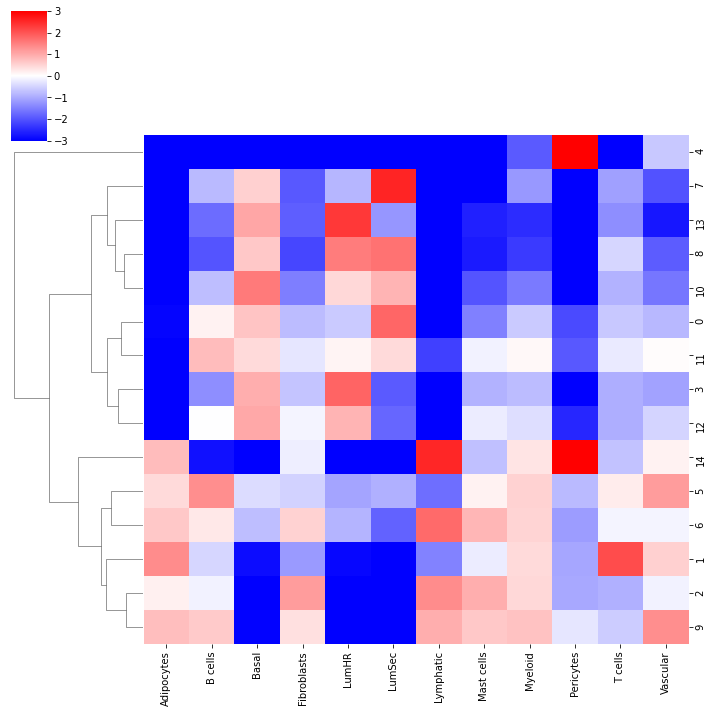

In [67]:
# this plot shows the types of cells (ClusterIDs) in the different niches (0-7)
k_to_plot = k
niche_clusters = (k_centroids[k_to_plot])
tissue_avgs = values_oneHotEncode.mean(axis = 0) ## mean value per cell type, one hot encoding
# log((niche_clusters+ avg)/sum_eachCell(niche_clusters+ avg))/avg)
fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
fc = pd.DataFrame(fc,columns = cellType_lst)
sns.clustermap(fc.loc[:,cell_order], vmin =-3,vmax = 3,cmap = 'bwr',row_cluster = True,col_cluster=False)

plt.savefig(os.path.join(plot_path,'heatmap_celltype_vs_neighborhood_cluster15_300dpi.pdf'), 
          dpi=300)

In [55]:
fc.to_csv(os.path.join(path, "heatmap_val_Neighborhood100_k15_.csv"))

In [63]:
cells.columns

Index(['orig.ident', 'nCount_Xenium', 'nFeature_Xenium',
       'nCount_BlankCodeword', 'nFeature_BlankCodeword',
       'nCount_ControlCodeword', 'nFeature_ControlCodeword',
       'nCount_ControlProbe', 'nFeature_ControlProbe', 'nCount_SCT',
       'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'cell_types',
       'region', 'hist_region', 'big_hist_region', 'x_centroid', 'y_centroid',
       'Adipocytes', 'B cells', 'Basal', 'Fibroblasts', 'LumHR', 'LumSec',
       'Lymphatic', 'Mast cells', 'Myeloid', 'Pericytes', 'T cells',
       'Vascular', 'neighborhood100'],
      dtype='object')

In [64]:
path

'/Volumes/shared/yanwen/xenium/data'

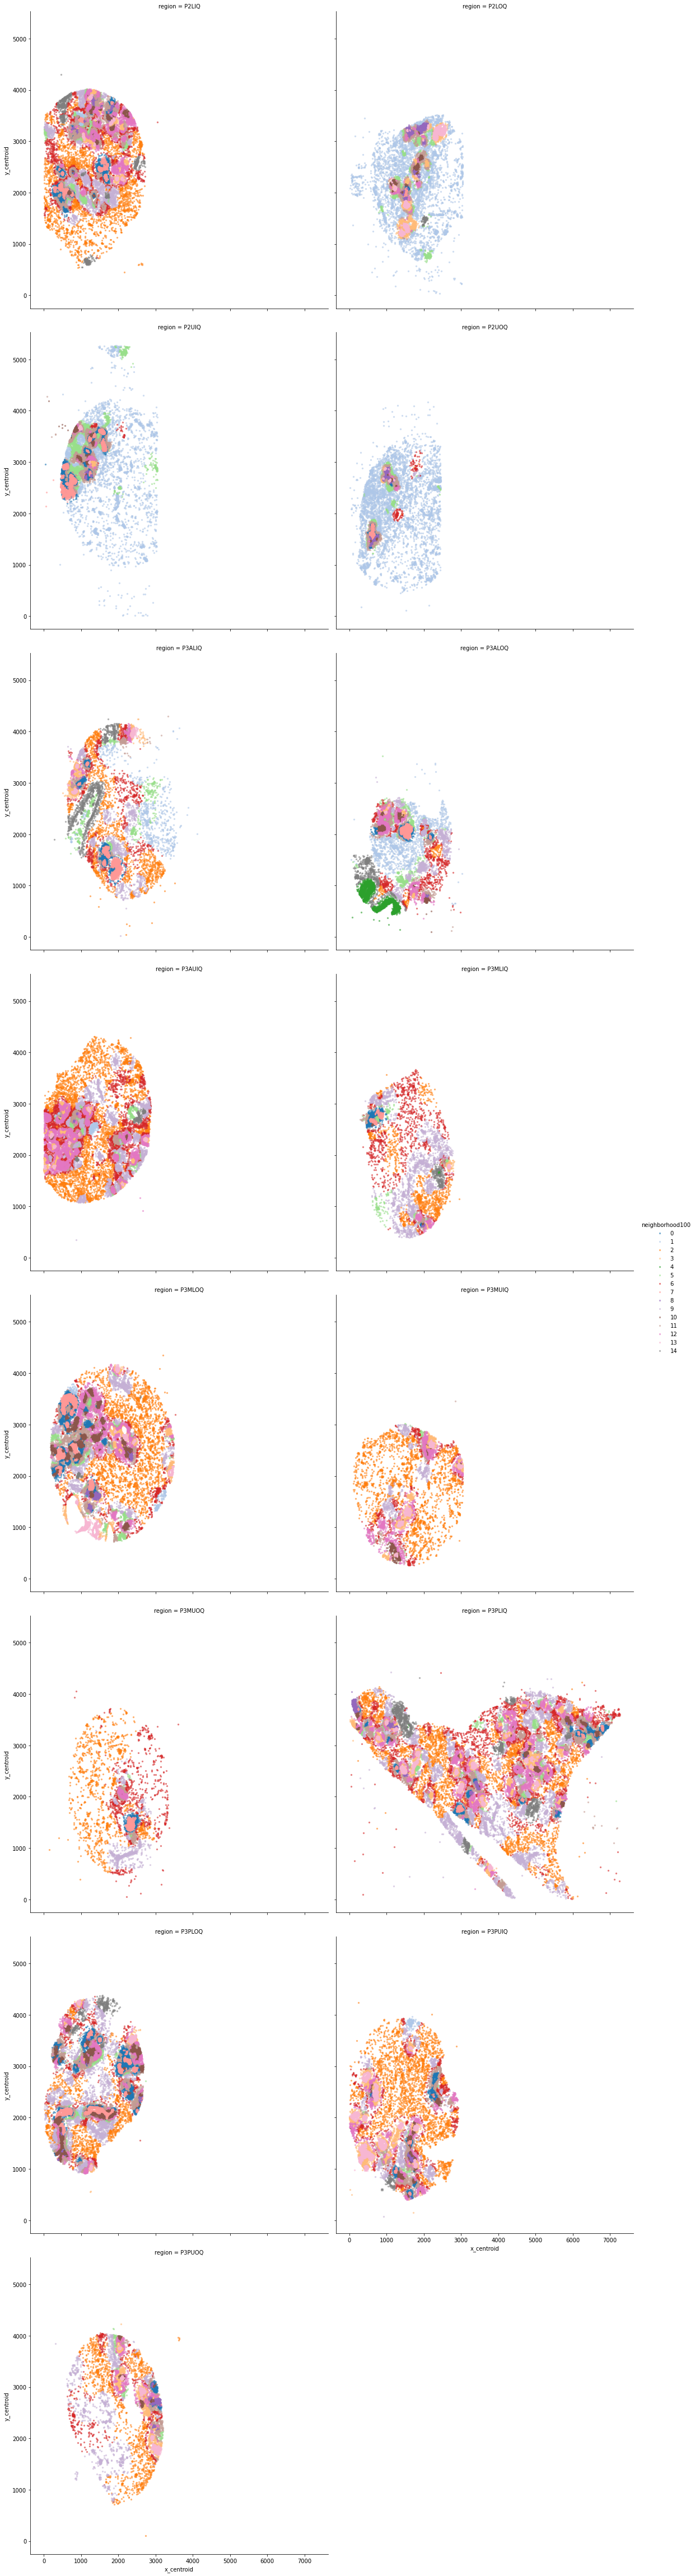

In [68]:

#cells['Y']=-cells['Y']

sns.lmplot(data = cells,x = X,y=Y,hue = neighborhood_name,palette = 'tab20',height = 8,col = sample_col,col_wrap = 2,fit_reg = False, scatter_kws={'alpha':0.5, "s": 5} )
plt.savefig(os.path.join(plot_path,'scatter_allsample_cluster15_300dpi.pdf'), 
          dpi=300)

In [65]:
cells.to_csv(os.path.join(path, "meta_with_neighborhood_20230516.csv"))

In [66]:
path

'/Volumes/shared/yanwen/xenium/data'